### UNSUPERVISED LEARNING - KMEANS AND AGGLOMERATIVE CLUSTERING

Clustering the similiar pattern of data using kmeans and agglomerative algorithmns



In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

### Reading the data 

In [55]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


### number of counts for each classes in dependent variable

In [57]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

### plotting different plots to see its pattern

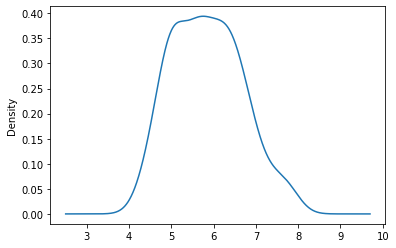

In [216]:
df['SepalLengthCm'].plot.kde()

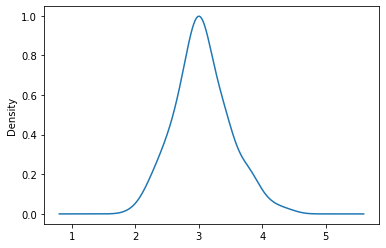

In [215]:
df['SepalWidthCm'].plot.kde()

In [214]:
px.box(df['SepalLengthCm'])

### Preprocessing
By applying LabelEncoding, Iris-setosa has encoded as 0, Iris-versicolor as 1, Iris-virginica as 2

In [61]:
from sklearn.preprocessing import LabelEncoder
df['Species_encode']=LabelEncoder().fit_transform(df['Species'])

In [62]:
pd.crosstab(df['Species'], df['Species_encode'])

Species_encode,0,1,2
Species,,,
Iris-setosa,50,0,0
Iris-versicolor,0,50,0
Iris-virginica,0,0,50


### MODEL FITTING

In [63]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans

In [64]:
agglo=AgglomerativeClustering(n_clusters=3)
kmeans=KMeans(n_clusters=3)
dbscan=DBSCAN()

In [79]:
agglo.fit(df.drop(['Species'], axis=1))

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [80]:
agglo.fit_predict(df.drop(['Species'], axis=1))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [81]:
agglo_labels=agglo.labels_

In [82]:
df1=df.copy()

In [83]:
df1['labels']=agglo_labels

In [84]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encode,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2,1


In [85]:
df1.labels.value_counts()

0    61
1    50
2    39
Name: labels, dtype: int64

### BOX PLOT TO FIND THE OUTLIERS 

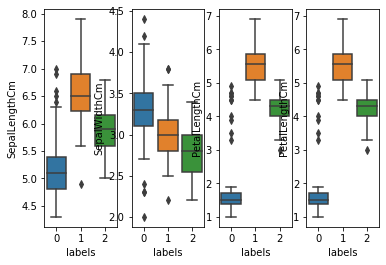

In [71]:
f, axes=plt.subplots(1,4)
sns.boxplot( x=df1['labels'], y=df1['SepalLengthCm'], ax=axes[0])
sns.boxplot( x=df1['labels'], y=df1['SepalWidthCm'], ax=axes[1])
sns.boxplot( x=df1['labels'], y=df1['PetalLengthCm'], ax=axes[2])
sns.boxplot( x=df1['labels'], y=df1['PetalLengthCm'], ax=axes[3])

In [86]:
kmeans.fit(X=df.drop('Species',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [87]:
kmeans.predict(df.drop('Species', axis=1))

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [88]:
df1['Kmeans_Label']=kmeans.labels_

In [89]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encode,labels,Kmeans_Label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,0,2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,0,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,0,2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,0,2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,0,2
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2,1,0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2,1,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2,1,0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2,1,0


In [90]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encode
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [94]:
pd.DataFrame(kmeans.cluster_centers_).T

,0,1,2
0,125.000000,74.500,25.000000
1,6.570588,5.922,5.006122
2,2.970588,2.780,3.420408
3,5.523529,4.206,1.465306
4,2.011765,1.304,0.244898
5,1.980392,0.980,0.000000


In [ ]:
# finding number of clusters
#centroids

In [102]:
from scipy.spatial.distance import euclidean, cdist, pdist

In [223]:
K=range(1,10)
km=[KMeans(n_clusters=k).fit(df.drop('Species', axis=1)) for k in K]
centroids= [k.cluster_centers_ for k in km]
print('centroids\n\n',centroids)

D_k=[cdist(df.drop('Species', axis=1), cent, 'euclidean') for cent in centroids]
print('D_k\n\n',D_k)
cIdx=[np.argmax(D, axis=1) for D in D_k]
dist=[np.min(D, axis=1) for D in D_k]
print('distance\n\n',dist)
avgWithinSS=[sum(D)/df.shape[0] for D in dist]
print('average of within sum of squares clusters\n',avgWithinSS)

wcss=[sum(d**2) for d in dist]
print('wcss\n\n', wcss)

tss= sum(pdist(df.drop('Species', axis=1))**2)/df.shape[0]
print('total sum of squares\n\n ', tss)
bss= tss-wcss
print('bss \n\n', bss)
varExplained= bss/tss*100
print('Variable Explained \n\n', varExplained)


centroids

 [array([[75.5       ,  5.84333333,  3.054     ,  3.75866667,  1.19866667,
         1.        ]]), array([[113.        ,   6.34533333,   2.904     ,   5.104     ,
          1.78666667,   1.66666667],
       [ 38.        ,   5.34133333,   3.204     ,   2.41333333,
          0.61066667,   0.33333333]]), array([[ 25.        ,   5.00612245,   3.42040816,   1.46530612,
          0.24489796,   0.        ],
       [125.        ,   6.57058824,   2.97058824,   5.52352941,
          2.01176471,   1.98039216],
       [ 74.5       ,   5.922     ,   2.78      ,   4.206     ,
          1.304     ,   0.98      ]]), array([[ 19.5       ,   5.05263158,   3.45263158,   1.46578947,
          0.23421053,   0.        ],
       [132.5       ,   6.61944444,   2.99722222,   5.52777778,
          2.025     ,   2.        ],
       [ 57.5       ,   5.66315789,   2.95      ,   3.41315789,
          1.00789474,   0.68421053],
       [ 95.5       ,   6.07894737,   2.81315789,   4.72105263,
          1.57

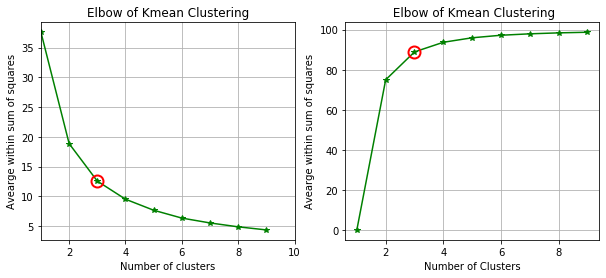

In [227]:
### plotting elbow curve

kIdx=2

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(K, avgWithinSS, 'g*-' )
plt.plot(K[kIdx], avgWithinSS[kIdx], 
         marker='o', markersize=12, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlim(1,10)
plt.xlabel('Number of clusters')
plt.ylabel('Avearge within sum of squares')
plt.title('Elbow of Kmean Clustering')

plt.subplot(1,2,2)
plt.plot(K, varExplained, 'g*-')
plt.plot(K[kIdx], varExplained[kIdx], marker='o', markersize=12, markeredgewidth=2, 
         markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Avearge within sum of squares')
plt.title(' Elbow of Kmean Clustering')
plt.tight_layout
plt.show()

In [154]:
Labels={0:'Iris-setosa', 1:'Iris-vercicolor', 2:'Iris-Virginica'}

In [162]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encode,labels,Kmeans_Label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,0,2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,0,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,0,2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,0,2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,0,2
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2,1,0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2,1,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2,1,0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2,1,0


In [163]:
df1['Species_encode']=df1['Species_encode'].map(Labels)
df1['labels']=df1['labels'].map(Labels)
df1['Kmeans_Label']=df1['Kmeans_Label'].map(Labels)

In [164]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encode,labels,Kmeans_Label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-Virginica
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-Virginica
2,3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-Virginica
3,4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-Virginica
4,5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-Virginica
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,Iris-Virginica,Iris-vercicolor,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica,Iris-Virginica,Iris-vercicolor,Iris-setosa
147,148,6.5,3.0,5.2,2.0,Iris-virginica,Iris-Virginica,Iris-vercicolor,Iris-setosa
148,149,6.2,3.4,5.4,2.3,Iris-virginica,Iris-Virginica,Iris-vercicolor,Iris-setosa


In [178]:
x=df.drop(['Id','Species','Species_encode'], axis=1)
kmeans=KMeans(n_clusters=3)

In [179]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [220]:
y_KMeans=kmeans.fit_predict(x)
y_KMeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [221]:
pd.DataFrame(y_KMeans).value_counts()

2    62
1    50
0    38
dtype: int64

In [186]:
x=x.values

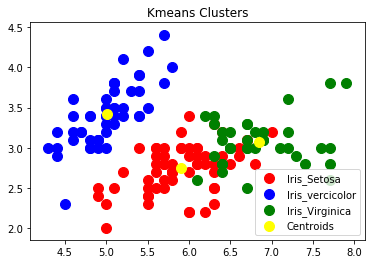

In [211]:
plt.scatter(x[y_means== 0,0], x[y_means==0,1],
           s=100, color='red', label='Iris_Setosa')
plt.scatter(x[y_means==1,0], x[y_means==1,1],
           s=100, color='blue', label='Iris_vercicolor')
plt.scatter(x[y_means==2,0], x[y_means==2,1],
           s=100, color='green', label='Iris_Virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s=100, c='yellow', label='Centroids')
plt.title('Kmeans Clusters')
plt.legend()
plt.show()

In [199]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encode
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [202]:
y_agglo=agglo.fit_predict(df.drop(['Id','Species', 'Species_encode'], axis=1))

In [218]:
pd.DataFrame(y_agglo).value_counts()

0    64
1    50
2    36
dtype: int64

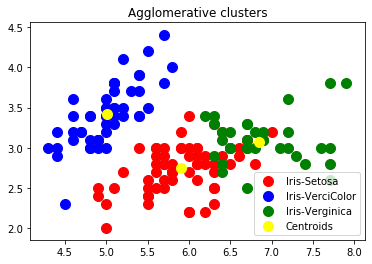

In [212]:
plt.scatter(x[y_agglo==0, 0], x[y_agglo==0,1], s=100, color='red', label='Iris-Setosa',)
plt.scatter(x[y_agglo==1, 0], x[y_agglo==1,1], s=100, color='blue', label='Iris-VerciColor')
plt.scatter(x[y_agglo==2, 0], x[y_agglo==2,1], s=100, color='green', label='Iris-Verginica')
plt.legend()
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=100, color='yellow', label='Centroids')
plt.title('Agglomerative clusters')
plt.legend()
plt.show()

In [229]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [238]:
kmeans.score(x)

-78.94084142614565